In [227]:
import pandas as pd
import datetime
import yfinance as yf
import matplotlib.pyplot as plt
import datetime as dt
import matplotlib.dates as mdates
from datetime import date
from datetime import timedelta, date
from yahoofinancials import YahooFinancials
from random import randint
import pandas_datareader as web
import numpy as np

1.	Depuis le site Yahoo Finance, téléchargez les prix des actions Apple (ticker : AAPL) du 01.01.2020 à aujourd’hui

In [228]:
ticker = "AAPL"
data = pd.DataFrame()
data[ticker] = web.DataReader(ticker, data_source = 'yahoo', 
                              start = "2020-01-01", 
                              end = "today")['Adj Close']
data = data.dropna()

In [229]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 490 entries, 2020-01-02 to 2021-12-09
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   AAPL    490 non-null    float64
dtypes: float64(1)
memory usage: 7.7 KB


In [230]:
data.head()

,AAPL
Date,
2020-01-02,73.988480
2020-01-03,73.269157
2020-01-06,73.852974
2020-01-07,73.505646
2020-01-08,74.688080


2.	Estimez les paramètres (valeur attendue, variance) des prix des actions, pour la sous-période 01.01.2020-28.02.2020

In [231]:
# Log Return
log_returns = np.log(1 + data.pct_change())
# Affichage de la fin du tableau
log_returns.tail()

,AAPL
Date,
2021-12-03,-0.011794
2021-12-06,0.021275
2021-12-07,0.034833
2021-12-08,0.022527
2021-12-09,0.003307


In [232]:
# Variance 
weight = np.array([0.25])
pfolio_var = round(np.dot(weight.T, np.dot(log_returns.cov()*250, weight)),2)
print("La variance du portefeuille est de " + str(pfolio_var*100) + str("%"))

La variance du portefeuille est de 1.0%


In [233]:
yf.multi

<module 'yfinance.multi' from 'C:\\Users\\Armel\\AppData\\Local\\Packages\\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\\LocalCache\\local-packages\\Python39\\site-packages\\yfinance\\multi.py'>

3.	Générez 100 marches aléatoires pour les prix du 01.03.2021 à aujourd’hui

In [234]:
def marche(valprec):
    if(valprec == 0):
        return valprec+1
    value = randint(valprec-1,valprec+1)
    while(value == valprec):
        value = marche(valprec)
    return value


def initialize_marche(debut=0):
    list_market = []
    list_market.append(debut)
    
    for i in range(99):
        value = marche(list_market[i])
        if(value < 0):
            list_market.append(0)
        else:
            list_market.append(value)
    return list_market

def initialize_marche2(debut=0):
    list_market = []
    list_market.append(debut)
    
    for i in range(999):
        value = marche(list_market[i])
        if(value < 0):
            list_market.append(0)
        else:
            list_market.append(value)
    return list_market

In [235]:
def daterange(start_date, end_date):
    for n in range(int ((end_date - start_date).days)):
        yield start_date + timedelta(n)

def generate_list_date(start_date, end_date):
    list_date = []
    i = 0

    for single_date in daterange(start_date, end_date):
        i += 1
        list_date.append(single_date.strftime("%Y-%m-%d"))
        if(i == 100):
            return list_date

def generate_list_date2(start_date, end_date):
    list_date = []
    i = 0

    for single_date in daterange(start_date, end_date):
        i += 1
        list_date.append(single_date.strftime("%Y-%m-%d"))
        if(i == 1000):
            return list_date



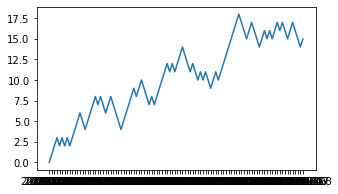

In [236]:
x = generate_list_date(date(2021, 3, 1), date.today())
y = initialize_marche()
plt.figure(1, figsize=(5, 3))
plt.plot(x,y)
plt.show()

4.	Représenter sur le même graph, les valeurs historiques du prix des Apple pour l’entièreté de la période téléchargées, et des marches aléatoires (à partir de la date indiquée au point précédent. Les échelles temporelles doivent évidemment être superposables)

5.	Rendez paramétrable – comme donnée d’entrée fournie par l’utilisateur – la date depuis
laquelle les marches aléatoires peuvent être générées (évidemment dans l’intervalle
01.01.2020-aujourd’hui).

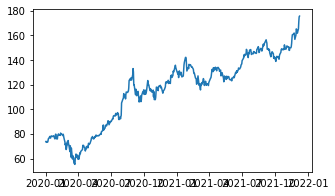

In [238]:
# Valeurs historiques AAPL 
plt.figure(1, figsize=(5, 3))
plt.plot(data)
plt.show()

In [239]:
price_list = data.values.tolist()
y_aapl = []
for sublist in price_list:
    for val in sublist:
        y_aapl.append(val)

In [240]:
today = datetime.date.today()
yesterday = today - datetime.timedelta(days = 1)
tomorrow = today + datetime.timedelta(days = 1)

def generate_aapl_market(y_aapl, data):
    x_generate = generate_list_date2(tomorrow, date(2030, 1, 1))
    axe_x = data.index.tolist() + x_generate
    y_generate = initialize_marche2(int(y_aapl[-1]))
    axe_y = y_aapl + y_generate
    return axe_x, axe_y

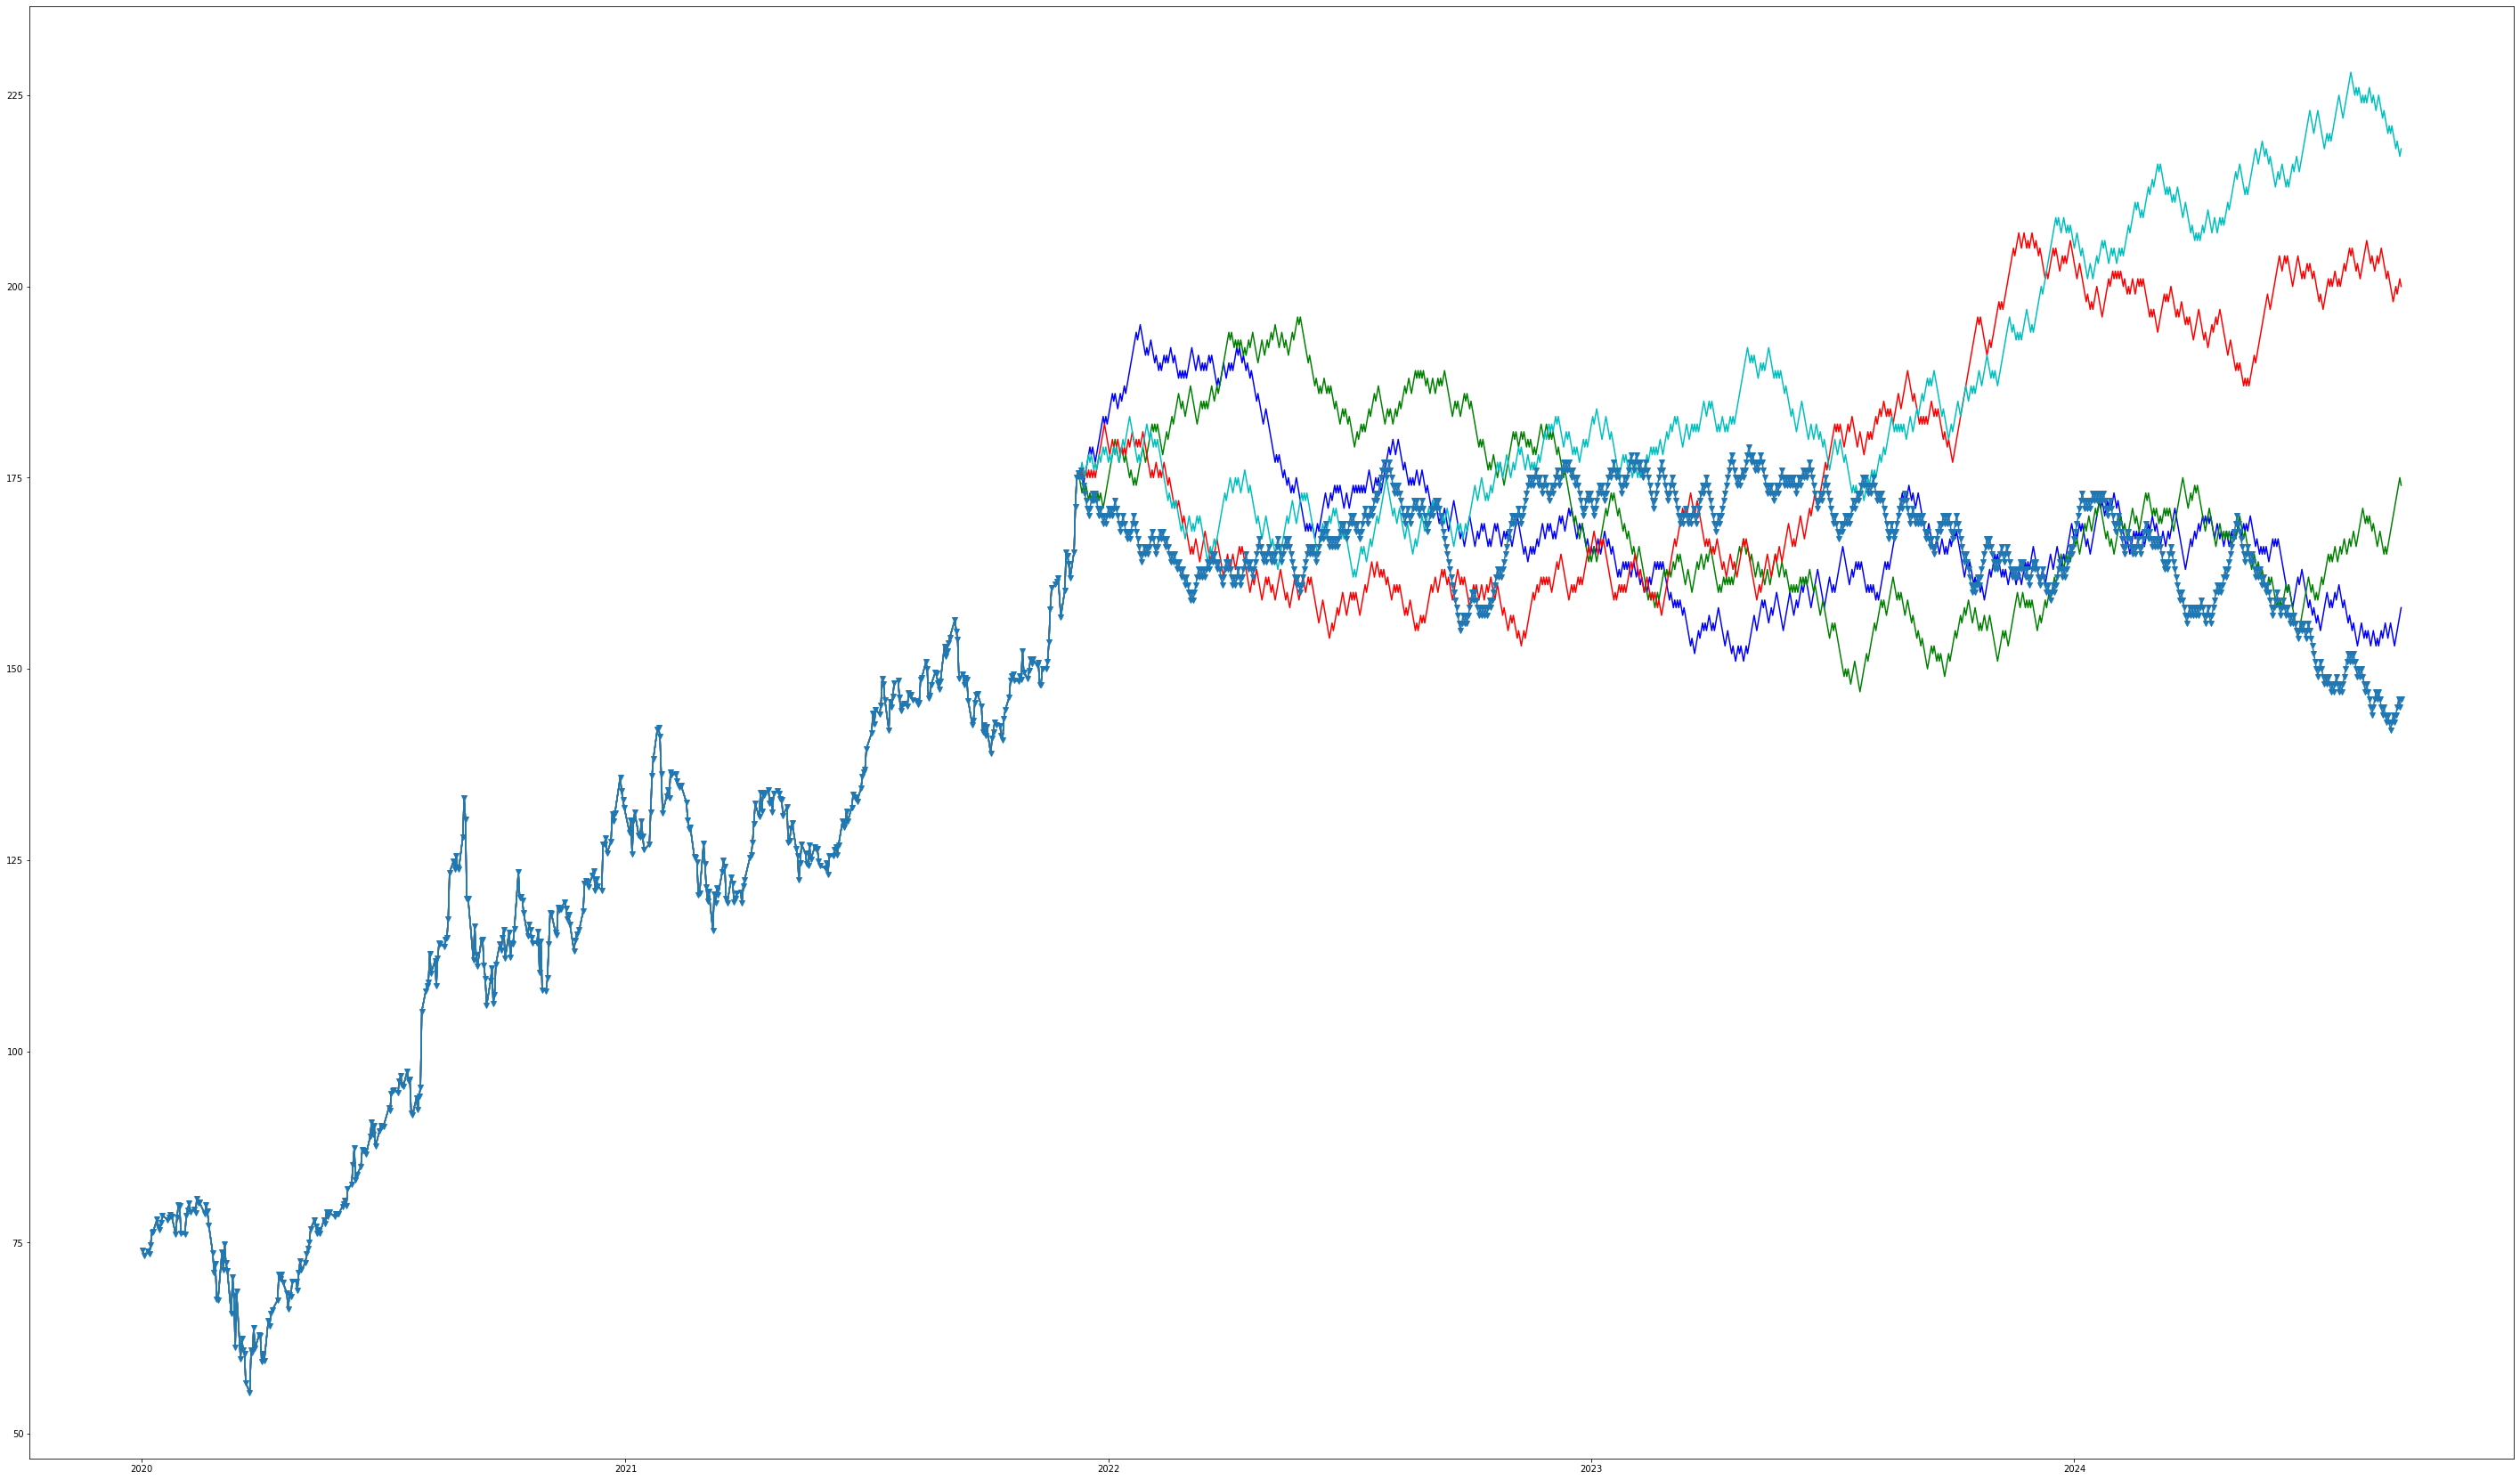

In [241]:
color_list = ['b-', 'g-', 'r-', 'c-', 'v-']
for i in range(5):
    axe_x, axe_y = generate_aapl_market(y_aapl, data)
    plt.figure(1, figsize=(50, 30))
    plt.plot(axe_x,axe_y, color_list[i])
plt.show()